In [1]:
import ROOT
import sys
import numpy as np

Welcome to JupyROOT 6.20/04


In [2]:
# read in data
inFile = ROOT . TFile . Open ( "ttH.root" , " READ " )
tree = inFile . Get ( "ttHyyTree" )

In [3]:
# creat a canvas
c = ROOT.TCanvas("myCanvasName","The Canvas Title",400,300)

In [4]:
# creat 4 empty hist
t1 = ROOT . TH1D ( "tlvb" ," m_{t->lvb} , transverse " ,150 ,0 ,600 )
t1 . Sumw2 ()

t2 = ROOT . TH1D ( "tqqb" ," m_{t->qqb} , transverse " ,150 ,0 ,600 )
t2 . Sumw2 ()

w1 = ROOT . TH1D ( "wlv" ," m_{w->lv} , transverse " ,150 ,0 ,600 )
w1 . Sumw2 ()

w2 = ROOT . TH1D ( "wqq" ," m_{w->qq} , transverse " ,150 ,0 ,600 )
w2 . Sumw2 ()

In [5]:
for entryNum in range (0 , tree . GetEntries ()):
  # read
  tree . GetEntry ( entryNum )

  # Event selection: 4jets, 2bjets, 1lepton
  btag = 0
    
  # 4jets
  if len(getattr(tree, "jet_btag77")) != 4:
    continue
    
  # 2bjets
  for i in getattr ( tree , "jet_btag77" ):
    if i:
      btag = btag + 1
  if btag != 2:
    continue

  # 1lepton
  if (getattr ( tree , "n_el" ) + getattr ( tree , "n_mu" )) != 1:
    continue

  # Lorentz vectors
  # lepton
  lepton = ROOT . TLorentzVector ()

  if getattr ( tree , "n_el" ) == 1 and getattr ( tree , "n_mu" ) == 0:
    lpt = getattr ( tree , "el_pt" )
    leta = getattr ( tree , "el_eta" )
    lphi = getattr ( tree , "el_phi" )
    lm = 0.000511 # electron mass


  if getattr ( tree , "n_mu" ) == 1 and getattr ( tree , "n_el" ) == 0:
    lpt = getattr ( tree , "mu_pt" )
    leta = getattr ( tree , "mu_eta" )
    lphi = getattr ( tree , "mu_phi" )
    lm = 0.10566 # muon mass

  lepton . SetPtEtaPhiM ( lpt[0] , leta[0] , lphi[0] , lm) 

  # neutrino
  nu = ROOT . TLorentzVector ()
  npx = - getattr ( tree , "met_x" )
  npy = - getattr ( tree , "met_y" )
  npz = 0
  nE = np.sqrt(npx**2+npy**2)
  nu . SetPxPyPzE ( npx , npy , npz , nE)

  # jets
  q1 = ROOT . TLorentzVector ()
  q2 = ROOT . TLorentzVector ()
  b1 = ROOT . TLorentzVector ()
  b2 = ROOT . TLorentzVector ()

  jpt = getattr ( tree , "jet_pt" )
  jeta = getattr ( tree , "jet_eta" )
  jphi = getattr ( tree , "jet_phi" )
  jE = getattr ( tree , "jet_E" )    
  isb = getattr ( tree , "jet_btag77" )

  if isb[0]:
    b1 . SetPtEtaPhiE (jpt[0] , jeta[0] , jphi[0] , jE[0])
    if isb[1]:
      b2 . SetPtEtaPhiE (jpt[1] , jeta[1] , jphi[1] , jE[1])
      q1 . SetPtEtaPhiE (jpt[2] , jeta[2] , jphi[2] , jE[2])
      q2 . SetPtEtaPhiE (jpt[3] , jeta[3] , jphi[3] , jE[3])
    else:
      q1 . SetPtEtaPhiE (jpt[1] , jeta[1] , jphi[1] , jE[1])
      if isb[2]:
        b2 . SetPtEtaPhiE (jpt[2] , jeta[2] , jphi[2] , jE[2])
        q2 . SetPtEtaPhiE (jpt[3] , jeta[3] , jphi[3] , jE[3])
      else:
        q2 . SetPtEtaPhiE (jpt[2] , jeta[2] , jphi[2] , jE[2])
        b2 . SetPtEtaPhiE (jpt[3] , jeta[3] , jphi[3] , jE[3])

  else:
    q1 . SetPtEtaPhiE (jpt[0] , jeta[0] , jphi[0] , jE[0])
    if isb[1]:
      b1 . SetPtEtaPhiE (jpt[1] , jeta[1] , jphi[1] , jE[1])
      if isb[2]:
        b2 . SetPtEtaPhiE (jpt[2] , jeta[2] , jphi[2] , jE[2])
        q2 . SetPtEtaPhiE (jpt[3] , jeta[3] , jphi[3] , jE[3])
      else:
        q2 . SetPtEtaPhiE (jpt[2] , jeta[2] , jphi[2] , jE[2])
        b2 . SetPtEtaPhiE (jpt[3] , jeta[3] , jphi[3] , jE[3])
        
    else:
      q2 . SetPtEtaPhiE (jpt[1] , jeta[1] , jphi[1] , jE[1])
      b1 . SetPtEtaPhiE (jpt[2] , jeta[2] , jphi[2] , jE[2])
      b2 . SetPtEtaPhiE (jpt[3] , jeta[3] , jphi[3] , jE[3])
  
  # Convert into transverse mass
  l_t = ROOT . TLorentzVector ()
  b1t = ROOT . TLorentzVector ()
  b2t = ROOT . TLorentzVector ()

  l_t . SetPxPyPzE(lepton.Px(), lepton.Py(), 0, lepton.E())
  b1t . SetPxPyPzE(b1.Px(), b1.Py(), 0, b1.E())
  b2t . SetPxPyPzE(b2.Px(), b2.Py(), 0, b2.E())  

  # W_t mass
  wlv = l_t + nu     # w1
  w1m = wlv.Mt()      

  wqq = q1 + q2      # w2
  w2m = wqq.Mt()

  # Top_t mass
  w1b1 = (wlv + b1t).Mt()
  w2b2 = (wqq + b2).Mt()

  w1b2 = (wlv + b2t).Mt()
  w2b1 = (wqq + b1).Mt()

  chi1 = (w1b1 - 173)**2 + (w2b2 - 173)**2
  chi2 = (w1b2 - 173)**2 + (w2b1 - 173)**2

  if chi1 <= chi2:
    tlvb = w1b1
    tqqb = w2b2

  else:
    tlvb = w1b2
    tqqb = w2b1

  # Fill the hist
  w1 . Fill ( w1m )
  w2 . Fill ( w2m )
  t1 . Fill ( tlvb )
  t2 . Fill ( tqqb )

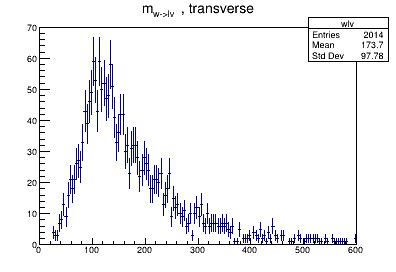

In [6]:
w1.Draw()
c.Draw()

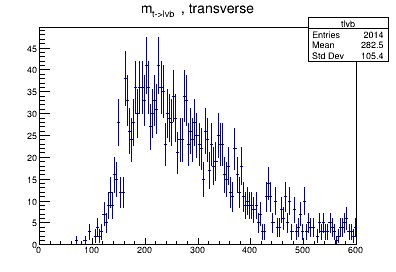

In [7]:
t1.Draw()
c.Draw()

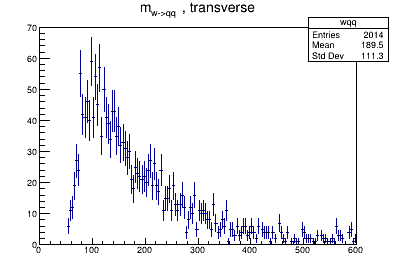

In [8]:
w2.Draw()
c.Draw()

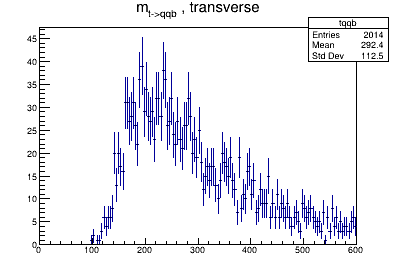

In [9]:
t2.Draw()
c.Draw()